In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib

In [44]:
path = "C:\\Users\\Vincent\\Github\\spectrometer-mwl\\Spectrogram Data\\"
data = pd.read_csv('C:\\Users\\Vincent\\Github\\spectrometer-mwl\\Spectrogram Data\\control-2023-03-29-tube.csv', sep=',',header=0)
path

'C:\\Users\\Vincent\\Github\\spectrometer-mwl\\Spectrogram Data\\'

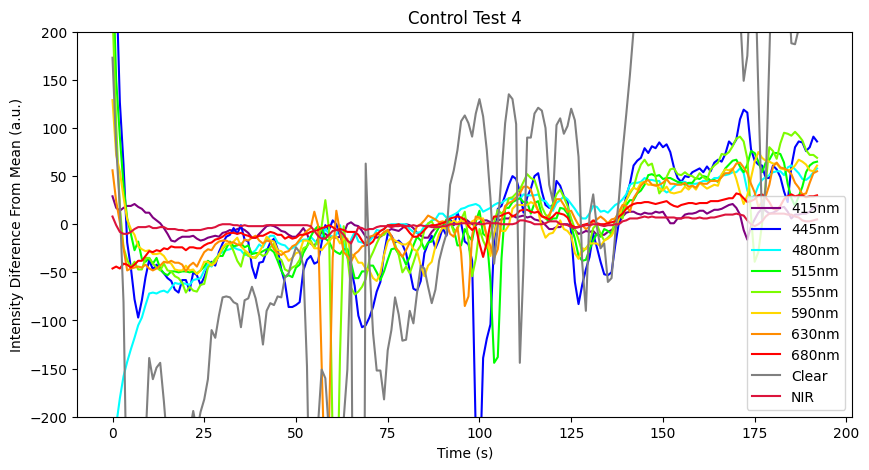

In [45]:
time = data['time'].to_list()
labels = data.columns.to_list()
jdat = data[1:].drop(columns='time').to_numpy().T
col = ['purple','blue','cyan','lime','lawngreen','gold','darkorange','red','gray','crimson']

for i in range(len(jdat)):
    mi = np.mean(jdat[i])
    for j in range(len(jdat[0])):
        jdat[i][j] = jdat[i][j] - mi

fig, ax = plt.subplots(figsize=(10, 5))
for i in range(len(jdat)):
    ax.plot(np.arange(len(jdat[0])), jdat[i], color=col[i], label=labels[i+1])
ax.legend()
plt.xlabel('Time (s)')
plt.ylabel('Intensity Diference From Mean (a.u.)')
plt.title('Control Test 4')
plt.ylim(-200,200)
plt.show()
#fig.savefig('control-test-mean-4.png', facecolor=fig.get_facecolor(), edgecolor='none')




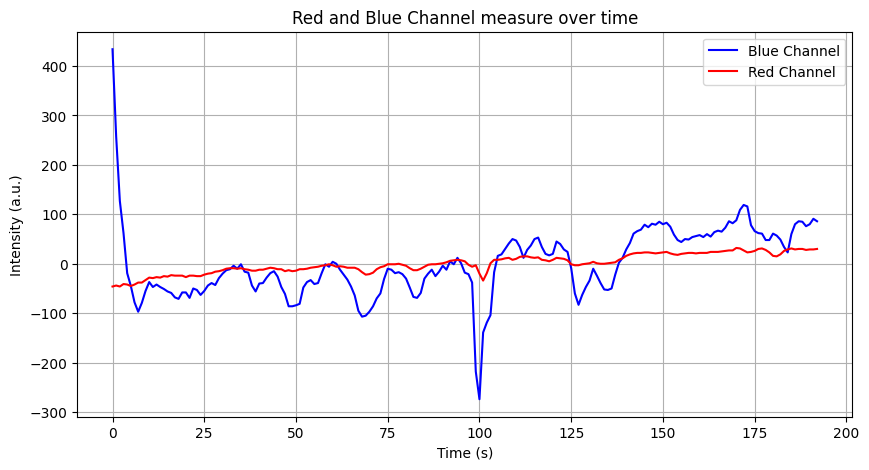

In [46]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(np.arange(len(jdat[0])), jdat[1], label='Blue Channel', color='blue')
ax.plot(np.arange(len(jdat[0])), jdat[7], label='Red Channel', color='red')
plt.grid()
plt.legend()
plt.title('Red and Blue Channel measure over time')
plt.xlabel('Time (s)')
plt.ylabel('Intensity (a.u.)')
plt.show()
#fig.savefig('b-vs-r.png', facecolor=fig.get_facecolor(), edgecolor='none')


In [70]:
# Control means by channel
raw_control = []

raw_control.append(pd.read_csv(path+'control-2023-03-29-tube.csv', sep=',',header=0))
raw_control.append(pd.read_csv(path+'control-2-2023-03-29-tube.csv', sep=',',header=0))

paths_list=['blue-2023-03-29-tube.csv', 'red-2023-03-29-tube.csv',
            '1-10-blue-2023-03-29-tube.csv', '1-10-red-2023-03-29-tube.csv',
            '1-100-blue-2023-03-29-tube.csv', '1-100-red-2023-03-29-tube.csv']

def read_paths_to_list(lista: list[str]):
    return [pd.read_csv(path+file, sep=',',header=0) for file in lista]
test1 = read_paths_to_list(paths_list)

# def to_jdat(d):
#     time = d['time'].to_list()
#     labels = d.columns.to_list()
#     jdat = d[1:].drop(columns='time').to_numpy().T
#     return jdat, labels

# def jdat_to_mean(jdat,c):
#     for i in range(len(jdat)):
#         #mi = np.mean(c[i])
#         for j in range(len(jdat[0])):
#             mi = c[i][j]
#             jdat[i][j] = float(jdat[i][j])/float(mi)
#     return jdat

# def mean_graph(dat, c, name, limit=None):
#     dat = to_jdat(dat)
#     c = to_jdat(c)
#     d = jdat_to_mean(dat,c)
#     fig, ax = plt.subplots(figsize=(10, 5))
#     for i in range(len(d)):
#         ax.plot(np.arange(len(d[0])), d[i], color=col[i], label=dat[1][i+1])
#     ax.legend()
#     plt.xlabel('Time (s)')
#     plt.ylabel('Intensity Diference From Mean (a.u.)')
#     plt.title(str(name))
#     if limit is not None:
#         plt.ylim(-int(limit),0)
#     plt.show()
#     #fig.savefig('control-test-mean-4.png', facecolor=fig.get_facecolor(), edgecolor='none')

def apply_function_to_list_of_dfs(list_df: list[pd.DataFrame], function):
    for df in list_df:
        for colum in df.columns[1:]:
            prom = df[colum].mean()
            df[colum] = function(df[colum])
    return list_df

test1 = apply_function_to_list_of_dfs(test1, lambda x: x/x.mean())
test1



[                    time     415nm     445nm     480nm     515nm     555nm  \
 0    2023-03-30 22:50:12  1.021518  1.020652  0.963822  1.019414  1.001926   
 1    2023-03-30 22:50:13  1.013977  1.012458  0.975009  1.009776  0.999174   
 2    2023-03-30 22:50:14  1.011823  1.009727  0.981589  1.007517  0.997453   
 3    2023-03-30 22:50:15  1.009310  1.006614  0.985318  1.005710  0.997109   
 4    2023-03-30 22:50:16  1.005001  1.005789  0.987731  1.004354  0.997109   
 ..                   ...       ...       ...       ...       ...       ...   
 189  2023-03-30 22:53:24  1.005001  1.003692  1.008569  1.003149  1.006743   
 190  2023-03-30 22:53:25  1.005001  1.003883  1.007911  1.003451  1.006743   
 191  2023-03-30 22:53:26  1.005360  1.003692  1.007253  1.003451  1.006743   
 192  2023-03-30 22:53:27  1.005001  1.003756  1.007253  1.003300  1.007431   
 193  2023-03-30 22:53:28  1.003924  1.003629  1.007473  1.003601  1.007431   
 
         590nm     630nm     680nm     Clear      

In [57]:
mean_graph(test1[0], raw_control[0], '1 drop blue', 45000)
mean_graph(test1[1], raw_control[0], '1 drop red', 25000)

TypeError: only size-1 arrays can be converted to Python scalars

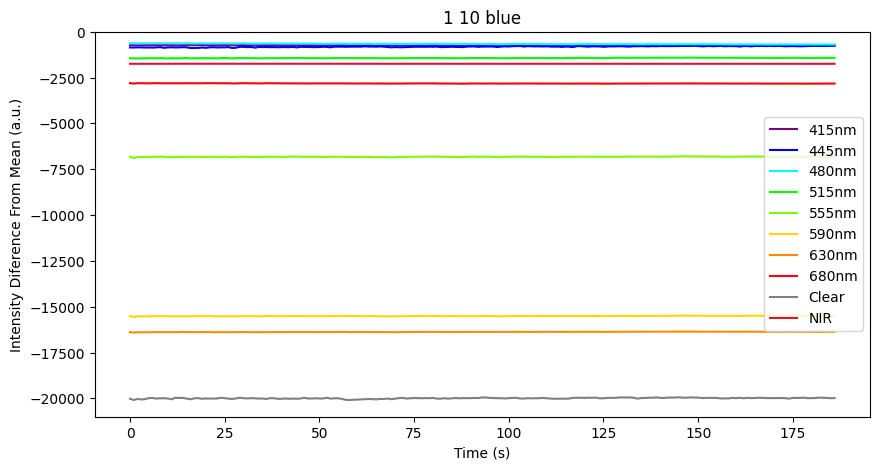

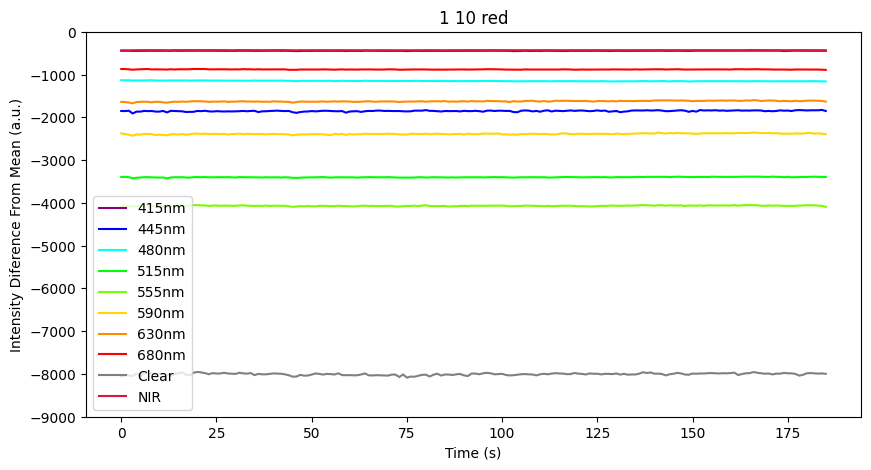

In [61]:
mean_graph(test1[2], raw_control[1], '1 10 blue', 21000)
mean_graph(test1[3], raw_control[1], '1 10 red', 9000)

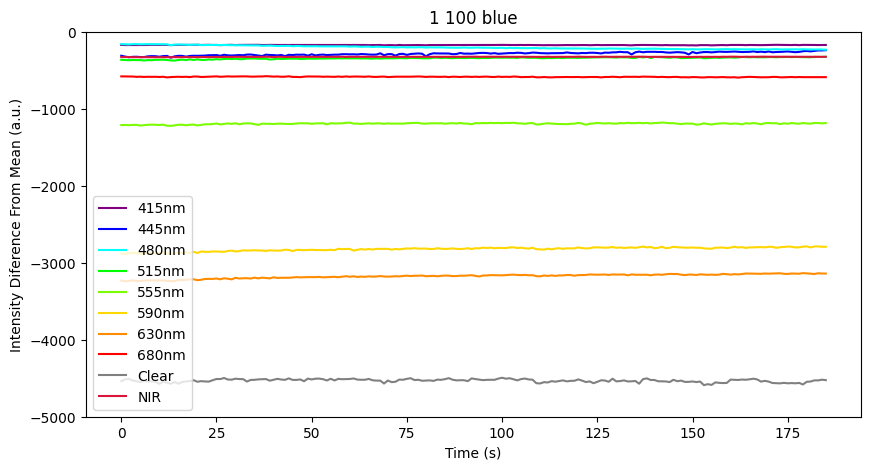

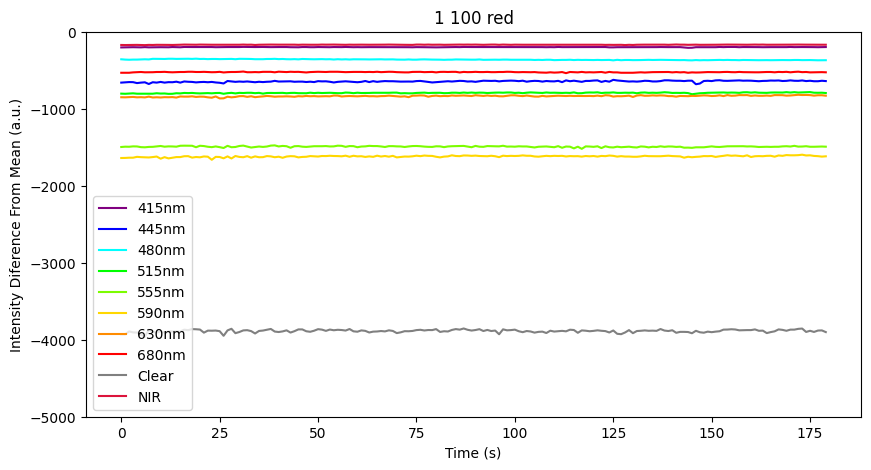

In [67]:
mean_graph(test1[4], raw_control[2], '1 100 blue', 5000)
mean_graph(test1[5], raw_control[2], '1 100 red', 5000)

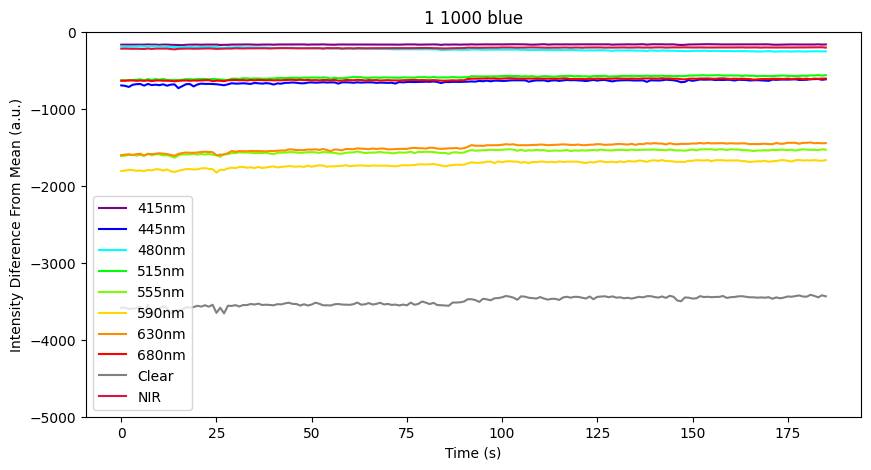

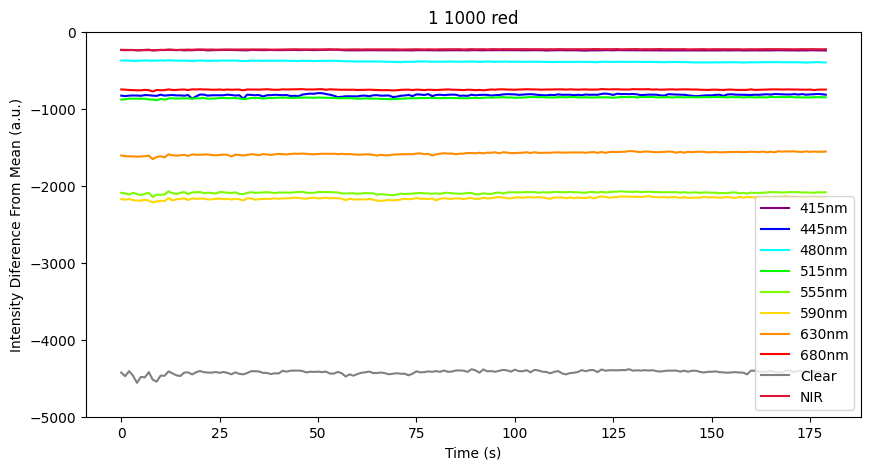

In [66]:
mean_graph(test1[6], raw_control[3], '1 1000 blue', 5000)
mean_graph(test1[7], raw_control[3], '1 1000 red', 5000)